# Name : Medikonda Siva

# Task - 02 (The Spark Foundation)

# In this task, We have to dovelop a classifier for the 'Iris' dataset and predict an optimum number of clusters and thus viusalizing them.

In [5]:
#impoting the Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [6]:
#importing the dataset using pandas

dataset=pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = dataset.iloc[: ,[1,2,3,4]].values
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Finding the optimum of clusters for K-means clssification


In [8]:
wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters = i,init ='k-means++',
                  max_iter=300,n_init=10,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\siva medikonda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plotting the results onto a line graph

# allowing us to observe 'The elbow'

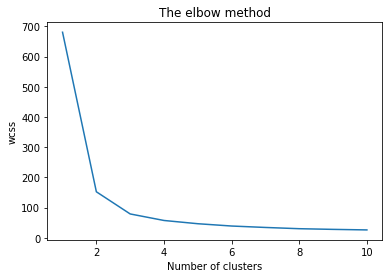

In [9]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


# From this we choose the number of clusters as '3'

In [10]:
kmeans=KMeans(n_clusters = 3, init = 'k-means++',
               max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters - On the first two clusters as '3'

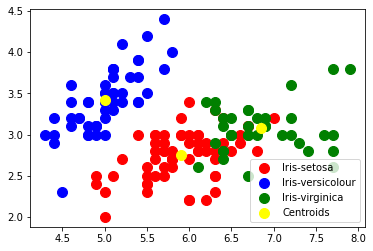

In [13]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],
           s=100, c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],
           s=100, c='blue',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],
           s=100, c='green',label='Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')

plt.legend()